In [1]:
%cd /content/drive/MyDrive/dataset

/content/drive/MyDrive/dataset


In [2]:
!unzip GeorgiaTech.zip

Archive:  GeorgiaTech.zip
   creating: gt_db_train/
   creating: gt_db_train/s01/
  inflating: gt_db_train/s01/01.jpg  
  inflating: gt_db_train/s01/02.jpg  
  inflating: gt_db_train/s01/03.jpg  
  inflating: gt_db_train/s01/04.jpg  
  inflating: gt_db_train/s01/05.jpg  
  inflating: gt_db_train/s01/06.jpg  
  inflating: gt_db_train/s01/07.jpg  
  inflating: gt_db_train/s01/08.jpg  
  inflating: gt_db_train/s01/09.jpg  
  inflating: gt_db_train/s01/10.jpg  
   creating: gt_db_train/s02/
  inflating: gt_db_train/s02/01.jpg  
  inflating: gt_db_train/s02/02.jpg  
  inflating: gt_db_train/s02/03.jpg  
  inflating: gt_db_train/s02/04.jpg  
  inflating: gt_db_train/s02/05.jpg  
  inflating: gt_db_train/s02/06.jpg  
  inflating: gt_db_train/s02/07.jpg  
  inflating: gt_db_train/s02/08.jpg  
  inflating: gt_db_train/s02/09.jpg  
  inflating: gt_db_train/s02/10.jpg  
   creating: gt_db_train/s03/
  inflating: gt_db_train/s03/01.jpg  
  inflating: gt_db_train/s03/02.jpg  
  inflating: gt_db_tra

In [3]:
%cd /content/drive/MyDrive/dataset

/content/drive/MyDrive/dataset


In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# Create a data generator
from keras.preprocessing.image import ImageDataGenerator

#Assignment7.1 part1
img_rows, img_cols = 100, 100
input_shape = (img_rows, img_cols, 3)
num_classes = 20
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/gt_db_train',target_size=(img_rows,img_cols),batch_size=10,class_mode='categorical', shuffle=True)
step_size_train = train_generator.n/train_generator.batch_size
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory('/content/drive/MyDrive/dataset/gt_db_val',target_size=(img_rows,img_cols),batch_size=10,class_mode='categorical', shuffle=True)
step_size_val = val_generator.n/val_generator.batch_size


Found 200 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [2]:
#Assignment7,1 part2
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                                 
 dense (Dense)               (None, 128)               18874496  
                                                                 
 dense_1 (Dense)             (None, 20)                2580      
                                                        

In [3]:
##Assignment7,1 part3
from tensorflow.keras.optimizers import SGD, Adam

adam = Adam(lr=0.0003)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=adam,
              metrics=['accuracy'])

history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,epochs=10,
                   validation_data=val_generator,
                   validation_steps=step_size_val)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
<ipython-input-3-19bd37ccd502>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/10
20/20 [==============================] - 174s 8s/step - loss: 3.1980 - accuracy: 0.1950 - val_loss: 2.0065 - val_accuracy: 0.6400
Epoch 2/10
20/20 [==============================] - 3s 160ms/step - loss: 1.4294 - accuracy: 0.7250 - val_loss: 0.6980 - val_accuracy: 0.8700
Epoch 3/10
20/20 [==============================] - 3s 159ms/step - loss: 0.3951 - accuracy: 0.9500 - val_loss: 0.2634 - val_accuracy: 0.9400
Epoch 4/10
20/20 [==============================] - 10s 505ms/step - loss: 0.1413 - accuracy: 0.9650 - val_loss: 0.1004 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 9s 433ms/step - loss: 0.0524 - accuracy: 0.9950 - val_loss: 0.0642 - val_accuracy: 1.0000
Epoch 6/10
20/20 [==============================] - 6s 282ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 3s 161ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 

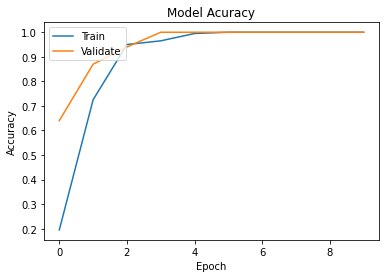

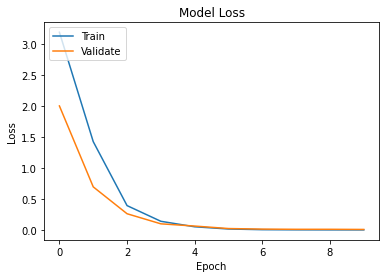

In [4]:
##Assignment7,1 part4
import matplotlib
import matplotlib.pyplot as plt
# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validate'], loc='upper left')
plt.savefig('Accuracy.png')
plt.show()

# Plot training loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validate'], loc='upper left')
plt.savefig('Loss.png')
plt.show()